In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
white = pd.read_csv('winequality-white.csv',delimiter=';')

In [3]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


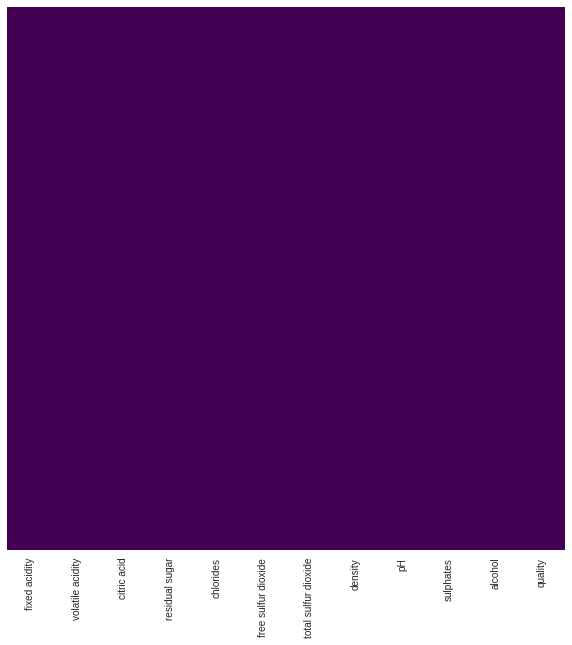

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(white.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


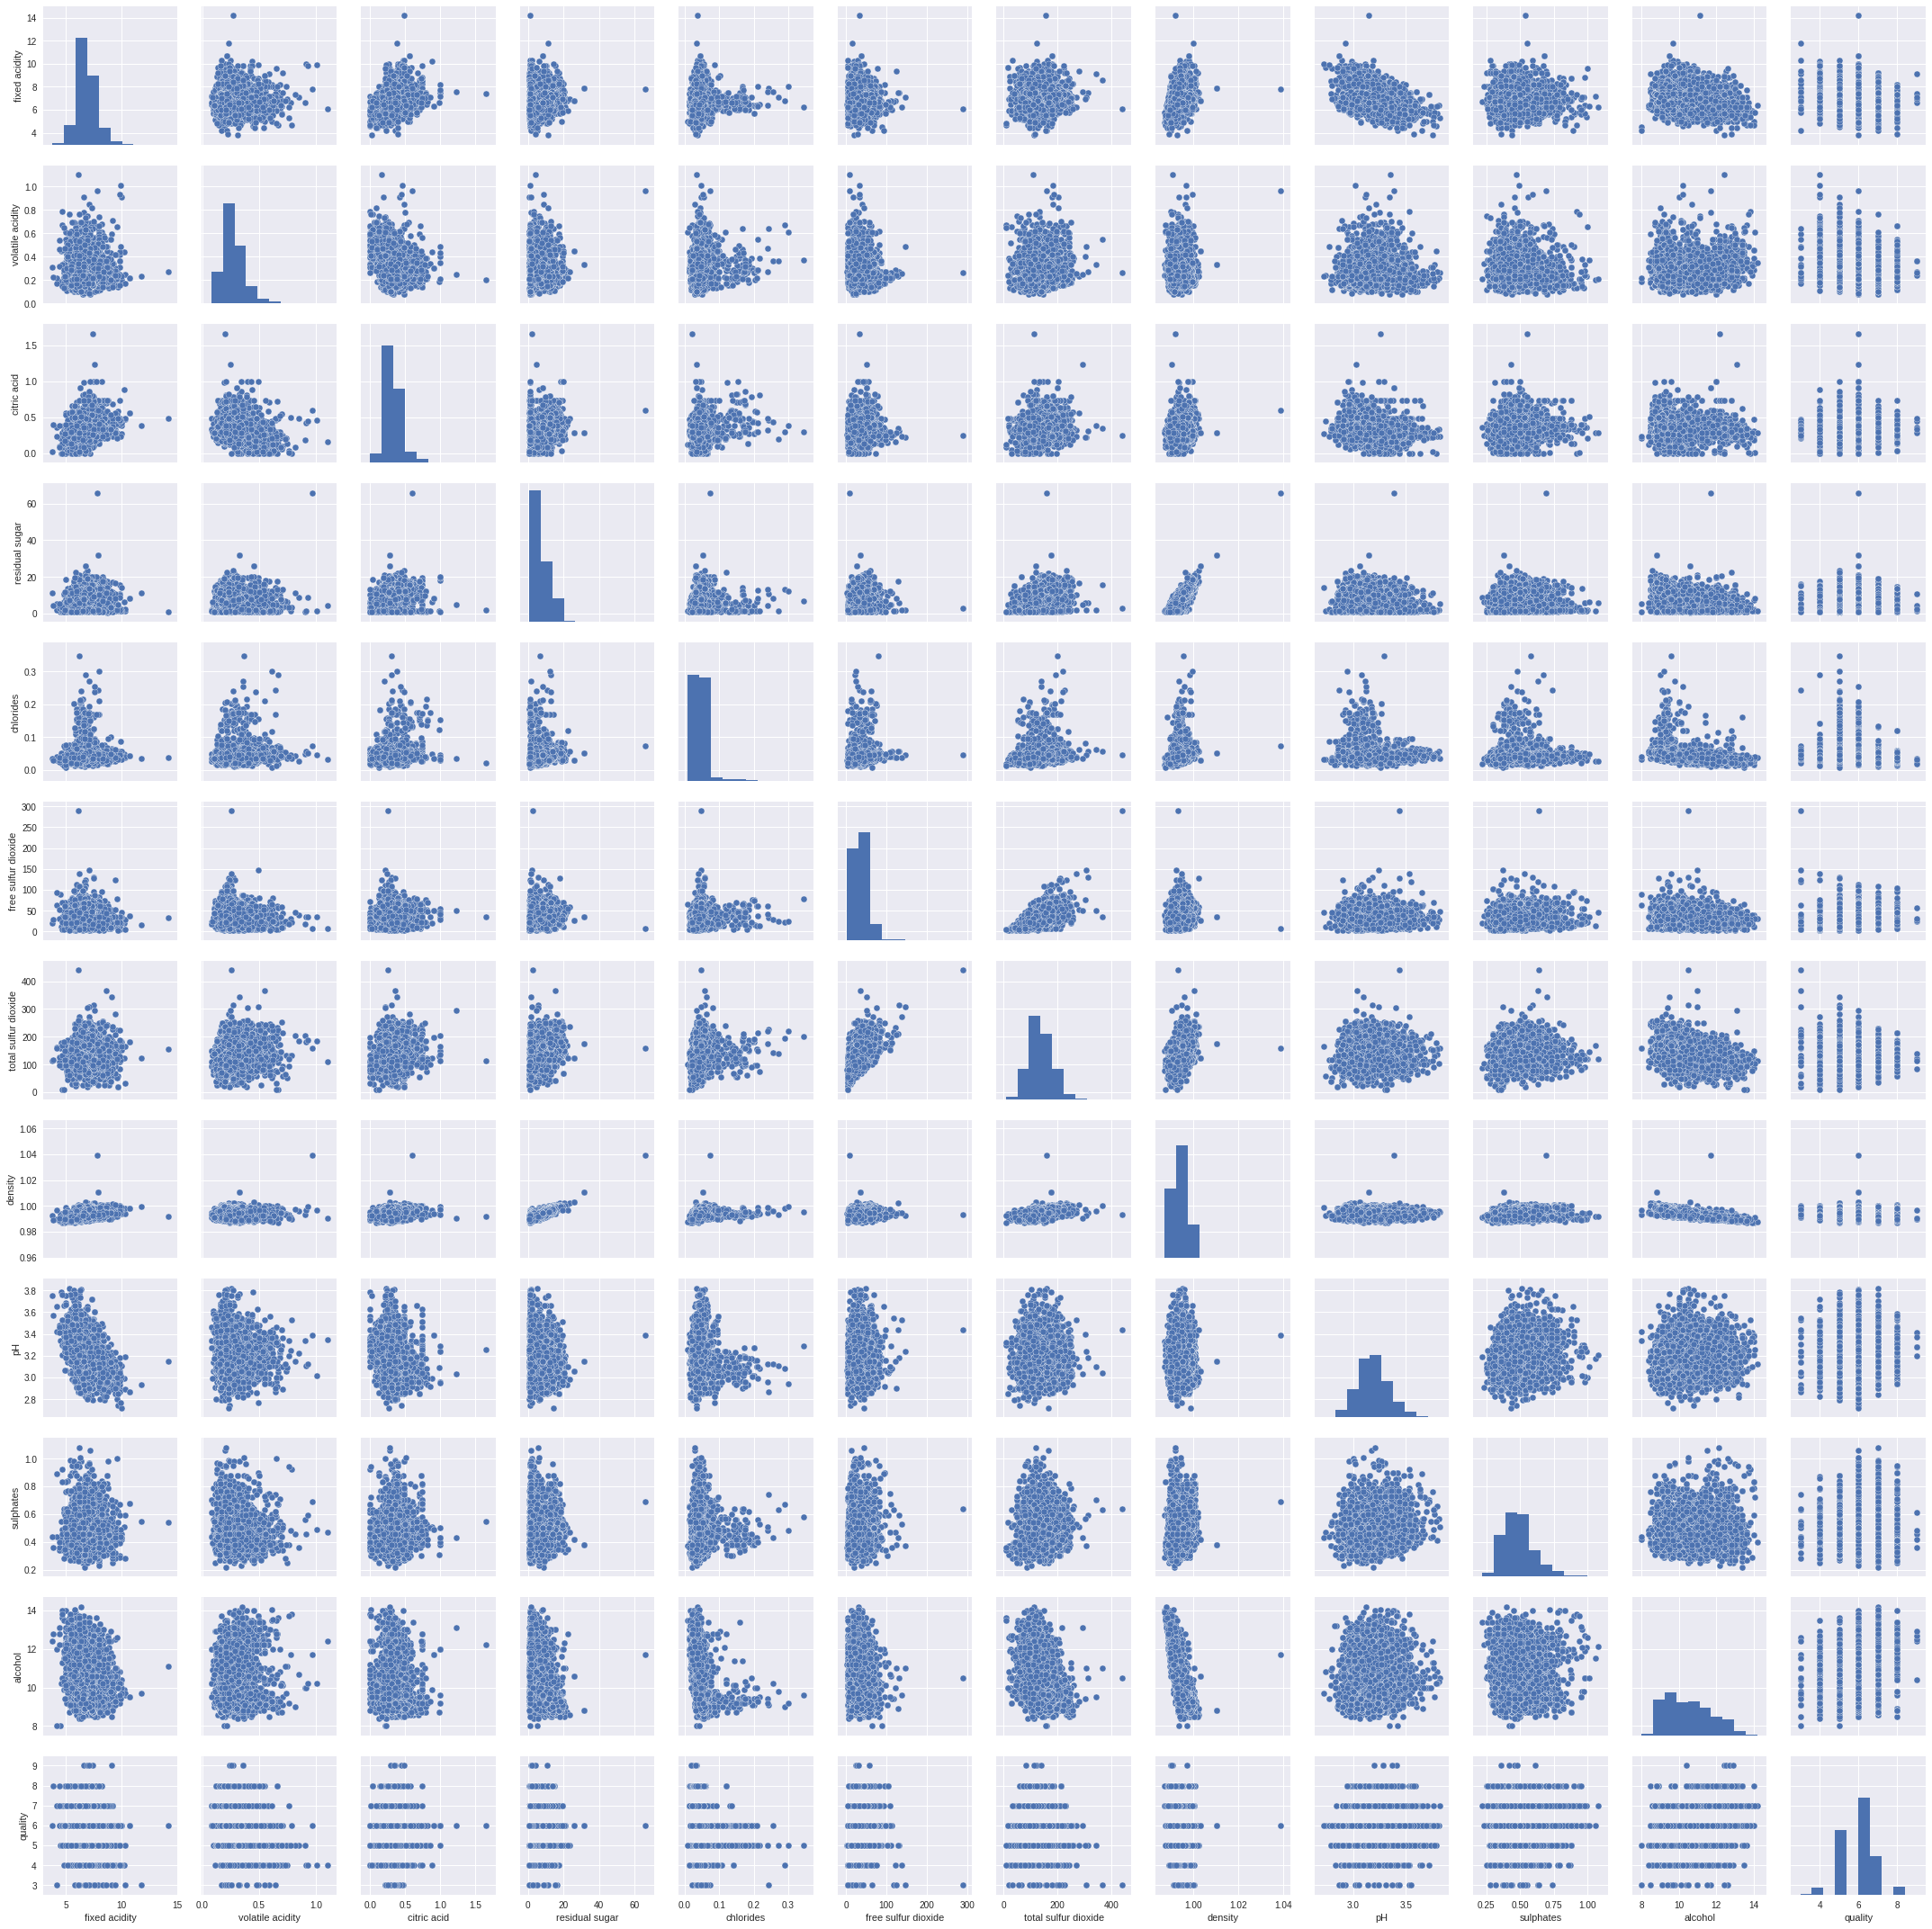

In [7]:
sns.pairplot(data=white)

In [10]:
white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

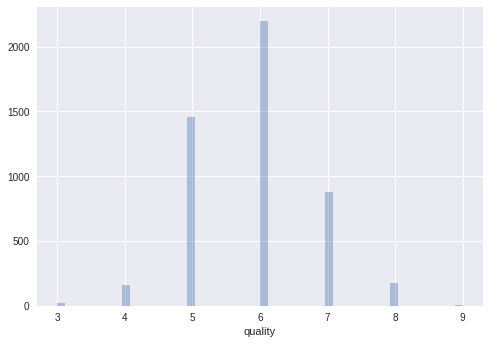

In [15]:
sns.distplot(white['quality'],kde=False)

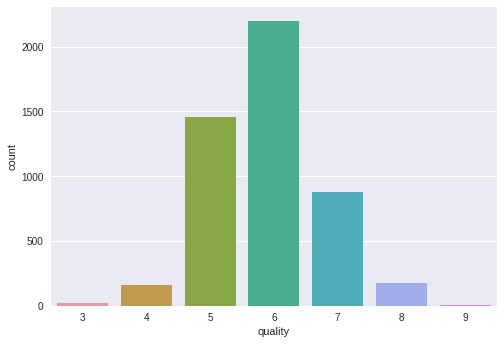

In [18]:
sns.countplot(x=white['quality'])

# Classification using Logistic Regression

In [19]:
from sklearn.cross_validation import train_test_split

In [27]:
X = white.drop('quality',axis=1)
y = white['quality']

In [28]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [29]:
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lm = LogisticRegression()

In [43]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
lmpredict = lm.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print('Classification Report :\n',classification_report(y_test,lmpredict),'\n','Confusion Matrix :\n',confusion_matrix(y_test,lmpredict))

Classification Report :
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         5
          4       0.00      0.00      0.00        55
          5       0.56      0.53      0.54       438
          6       0.52      0.79      0.63       666
          7       0.38      0.08      0.13       251
          8       0.00      0.00      0.00        54
          9       0.00      0.00      0.00         1

avg / total       0.47      0.53      0.47      1470
 
 Confusion Matrix :
 [[  0   0   3   2   0   0   0]
 [  0   0  39  16   0   0   0]
 [  0   0 231 204   3   0   0]
 [  0   0 118 527  21   0   0]
 [  0   0  17 214  20   0   0]
 [  0   0   3  43   8   0   0]
 [  0   0   0   1   0   0   0]]


/home/santhosh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Classification using KNN

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [49]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
scaled_features = scaler.transform(X)

In [51]:
scaled_features

array([[  1.72096961e-01,  -8.17699008e-02,   2.13280202e-01, ...,
         -1.24692128e+00,  -3.49184257e-01,  -1.39315246e+00],
       [ -6.57501128e-01,   2.15895632e-01,   4.80011213e-02, ...,
          7.40028640e-01,   1.34184656e-03,  -8.24275678e-01],
       [  1.47575110e+00,   1.74519434e-02,   5.43838363e-01, ...,
          4.75101984e-01,  -4.36815783e-01,  -3.36667007e-01],
       ..., 
       [ -4.20473102e-01,  -3.79435433e-01,  -1.19159198e+00, ...,
         -1.31315295e+00,  -2.61552731e-01,  -9.05543789e-01],
       [ -1.60561323e+00,   1.16673788e-01,  -2.82557040e-01, ...,
          1.00495530e+00,  -9.62604939e-01,   1.85757201e+00],
       [ -1.01304317e+00,  -6.77100966e-01,   3.78559282e-01, ...,
          4.75101984e-01,  -1.48839409e+00,   1.04489089e+00]])

In [55]:
wh_feat = pd.DataFrame(scaled_features,columns=white.columns[:-1])

In [56]:
wh_feat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


In [57]:
from sklearn.cross_validation import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
err = []

for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predi = knn.predict(X_test)
    err.append(np.mean(predi!=y_test))

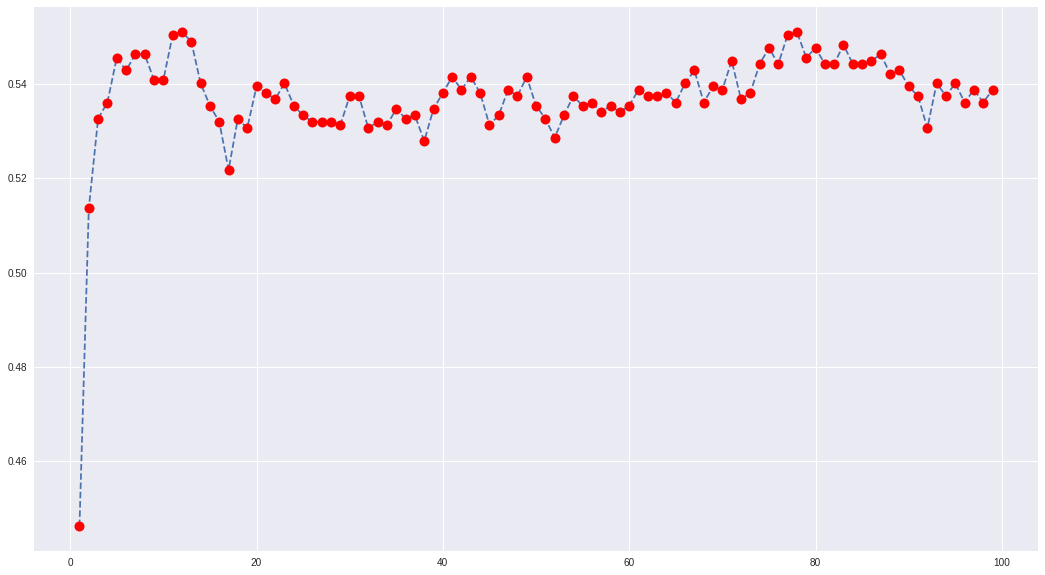

In [115]:
plt.figure(figsize=(18,10))
plt.plot(range(1,100),err,ls='--',marker='o',mfc='red',ms=10)

In [125]:
knn = KNeighborsClassifier(n_neighbors=90)
knn.fit(X_train,y_train)
predi = knn.predict(X_test)

In [126]:
from sklearn.metrics import confusion_matrix,classification_report

In [127]:
print('Classification Report :\n',classification_report(y_test,lmpredict),'\n','Confusion Matrix :\n',confusion_matrix(y_test,lmpredict))

Classification Report :
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         5
          4       0.00      0.00      0.00        55
          5       0.56      0.53      0.54       438
          6       0.52      0.79      0.63       666
          7       0.38      0.08      0.13       251
          8       0.00      0.00      0.00        54
          9       0.00      0.00      0.00         1

avg / total       0.47      0.53      0.47      1470
 
 Confusion Matrix :
 [[  0   0   3   2   0   0   0]
 [  0   0  39  16   0   0   0]
 [  0   0 231 204   3   0   0]
 [  0   0 118 527  21   0   0]
 [  0   0  17 214  20   0   0]
 [  0   0   3  43   8   0   0]
 [  0   0   0   1   0   0   0]]


/home/santhosh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
